In [ ]:
!pip install rake-nltk

In [1]:
import pandas as pd
df = pd.read_excel("Charger.xlsx")

In [2]:
reviews = df['reviewText'].tolist()

In [3]:
from rake_nltk import Rake
r = Rake()
all_tags = []
for review in reviews:
    current_tag = []
    r.extract_keywords_from_text(review)
    current_tag = r.get_ranked_phrases()[:5]
    all_tags.append(current_tag)

In [4]:
all_tags

[['would recommend', 'woks fine', 'complaints !!!', 'good charger', 'good'],
 ['genuine blackberry charger',
  'worked perfectly',
  'product arrived',
  'brand new',
  'condition promised'],
 ['great product', 'galaxy s4', 'ever travel', 'car incase', 'bought 2'],
 ['works pretty well',
  'fast charging needs',
  'high end phones',
  'specific model',
  'exactly meet'],
 ['still works perfectly',
  'folding blades make',
  'different countries',
  'charger well',
  'blackberry models'],
 ['direct wall charger', 'charges fast', 'usb', 'specified', 'problems'],
 ['last pretty good 3 years fits',
  'phones except iphone',
  'still use',
  'right side',
  'judy charge'],
 ['good phone charger', 'affordable price', 'job', 'buy', 'anyone'],
 ['extra usb charger', 'works well', 'works great', 'note 2', 'low price'],
 ['tall bed', 'place 100', 'little worn', 'little blocky', 'cord length'],
 ['nice long cable',
  'spare charger',
  'one failed',
  'main charger',
  'galaxy s3'],
 ['thru sever

In [10]:
!pip install folium

     |████████████████████████████████| 93 kB 347 kB/s eta 0:00:011


In [11]:
import numpy  as np
import pandas as pd

import json

# Corpus Processing
import re
import nltk.corpus
from unidecode                        import unidecode
from nltk.tokenize                    import word_tokenize
from nltk                             import SnowballStemmer
from sklearn.feature_extraction.text  import TfidfVectorizer
from sklearn.preprocessing            import normalize

# K-Means
from sklearn import cluster

# Visualization and Analysis
import matplotlib.pyplot  as plt
import matplotlib.cm      as cm
import seaborn            as sns
from sklearn.metrics                  import silhouette_samples, silhouette_score
from wordcloud                        import WordCloud

# Map Viz
import folium
#import branca.colormap as cm
from branca.element import Figure


In [12]:
tag_list = []
for sublist in all_tags:
    for item in sublist:
        tag_list.append(item)

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

In [49]:
corpus = tag_list

In [50]:
# removes a list of words (ie. stopwords) from a tokenized list.
def removeWords(listOfTokens, listOfWords):
    return [token for token in listOfTokens if token not in listOfWords]

# applies stemming to a list of tokenized words
def applyStemming(listOfTokens, stemmer):
    return [stemmer.stem(token) for token in listOfTokens]

# removes any words composed of less than 2 or more than 21 letters
def twoLetters(listOfTokens):
    twoLetterWord = []
    for token in listOfTokens:
        if len(token) <= 2 or len(token) >= 21:
            twoLetterWord.append(token)
    return twoLetterWord

In [53]:
def processCorpus(corpus, language):   
    stopwords = nltk.corpus.stopwords.words(language)
    param_stemmer = SnowballStemmer(language)
    #countries_list = [line.rstrip('\n') for line in open('lists/countries.txt')] # Load .txt file line by line
    #nationalities_list = [line.rstrip('\n') for line in open('lists/nationalities.txt')] # Load .txt file line by line
    #other_words = [line.rstrip('\n') for line in open('lists/stopwords_scrapmaker.txt')] # Load .txt file line by line
    
    for document in corpus:
        index = corpus.index(document)
        corpus[index] = corpus[index].replace(u'\ufffd', '8')   # Replaces the ASCII '�' symbol with '8'
        corpus[index] = corpus[index].replace(',', '')          # Removes commas
        corpus[index] = corpus[index].rstrip('\n')              # Removes line breaks
        corpus[index] = corpus[index].casefold()                # Makes all letters lowercase
        
        corpus[index] = re.sub('\W_',' ', corpus[index])        # removes specials characters and leaves only words
        #corpus[index] = re.sub("\S*\d\S*"," ", corpus[index])   # removes numbers and words concatenated with numbers IE h4ck3r. Removes road names such as BR-381.
        #corpus[index] = re.sub("\S*@\S*\s?"," ", corpus[index]) # removes emails and mentions (words with @)
        #corpus[index] = re.sub(r'http\S+', '', corpus[index])   # removes URLs with http
        #corpus[index] = re.sub(r'www\S+', '', corpus[index])    # removes URLs with www

        listOfTokens = word_tokenize(corpus[index])
        twoLetterWord = twoLetters(listOfTokens)

        listOfTokens = removeWords(listOfTokens, stopwords)
        listOfTokens = removeWords(listOfTokens, twoLetterWord)
        #listOfTokens = removeWords(listOfTokens, countries_list)
        #listOfTokens = removeWords(listOfTokens, nationalities_list)
        #listOfTokens = removeWords(listOfTokens, other_words)
        
        listOfTokens = applyStemming(listOfTokens, param_stemmer)
        #listOfTokens = removeWords(listOfTokens, other_words)

        corpus[index]   = " ".join(listOfTokens)
        corpus[index] = unidecode(corpus[index])

    return corpus

In [54]:
language = 'english'
corpus = processCorpus(corpus, language)

In [55]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)
tf_idf = pd.DataFrame(data = X.toarray(), columns=vectorizer.get_feature_names())

final_df = tf_idf

print("{} rows".format(final_df.shape[0]))
final_df.T.nlargest(5, 0)

346 rows


,0,1,2,3,4,5,6,7,8,9,...,336,337,338,339,340,341,342,343,344,345
would,0.715159,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
recommend,0.698962,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12v,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
act,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [56]:
def run_KMeans(max_k, data):
    max_k += 1
    kmeans_results = dict()
    for k in range(2 , max_k):
        kmeans = cluster.KMeans(n_clusters = k
                               , init = 'k-means++'
                               , n_init = 10
                               , tol = 0.0001
                               , n_jobs = -1
                               , random_state = 1
                               , algorithm = 'full')

        kmeans_results.update( {k : kmeans.fit(data)} )
        
    return kmeans_results

In [57]:
def printAvg(avg_dict):
    for avg in sorted(avg_dict.keys(), reverse=True):
        print("Avg: {}\tK:{}".format(avg.round(4), avg_dict[avg]))
        
def plotSilhouette(df, n_clusters, kmeans_labels, silhouette_avg):
    fig, ax1 = plt.subplots(1)
    fig.set_size_inches(8, 6)
    ax1.set_xlim([-0.2, 1])
    ax1.set_ylim([0, len(df) + (n_clusters + 1) * 10])
    
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--") # The vertical line for average silhouette score of all the values
    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])
    plt.title(("Silhouette analysis for K = %d" % n_clusters), fontsize=10, fontweight='bold')
    
    y_lower = 10
    sample_silhouette_values = silhouette_samples(df, kmeans_labels) # Compute the silhouette scores for each sample
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[kmeans_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i)) # Label the silhouette plots with their cluster numbers at the middle
        y_lower = y_upper + 10  # Compute the new y_lower for next plot. 10 for the 0 samples
    plt.show()
    
        
def silhouette(kmeans_dict, df, plot=False):
    df = df.to_numpy()
    avg_dict = dict()
    for n_clusters, kmeans in kmeans_dict.items():      
        kmeans_labels = kmeans.predict(df)
        silhouette_avg = silhouette_score(df, kmeans_labels) # Average Score for all Samples
        avg_dict.update( {silhouette_avg : n_clusters} )
    
        if(plot): plotSilhouette(df, n_clusters, kmeans_labels, silhouette_avg)

In [58]:
# Running Kmeans
k = 8
kmeans_results = run_KMeans(k, final_df)

# Plotting Silhouette Analysis
#silhouette(kmeans_results, final_df, plot=True)

/home/abhrant/python/deep_learning/lib/python3.6/site-packages/sklearn/cluster/_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)
/home/abhrant/python/deep_learning/lib/python3.6/site-packages/sklearn/cluster/_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)
/home/abhrant/python/deep_learning/lib/python3.6/site-packages/sklearn/cluster/_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)
/home/abhrant/python/deep_learning/lib/python3.6/site-packages/sklearn/cluster/_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)
/home/abhrant/python/deep_learning/lib/python3.6/site-packages/sklearn/cluster/_kmeans.py:939: FutureWarning: 'n_jobs' was deprecate

In [59]:
def get_top_features_cluster(tf_idf_array, prediction, n_feats):
    labels = np.unique(prediction)
    dfs = []
    for label in labels:
        id_temp = np.where(prediction==label) # indices for each cluster
        x_means = np.mean(tf_idf_array[id_temp], axis = 0) # returns average score across cluster
        sorted_means = np.argsort(x_means)[::-1][:n_feats] # indices with top 20 scores
        features = vectorizer.get_feature_names()
        best_features = [(features[i], x_means[i]) for i in sorted_means]
        df = pd.DataFrame(best_features, columns = ['features', 'score'])
        dfs.append(df)
    return dfs

def plotWords(dfs, n_feats):
    plt.figure(figsize=(8, 4))
    for i in range(0, len(dfs)):
        plt.title(("Most Common Words in Cluster {}".format(i)), fontsize=10, fontweight='bold')
        sns.barplot(x = 'score' , y = 'features', orient = 'h' , data = dfs[i][:n_feats])
        plt.show()

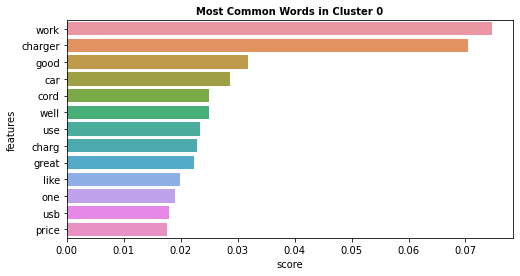

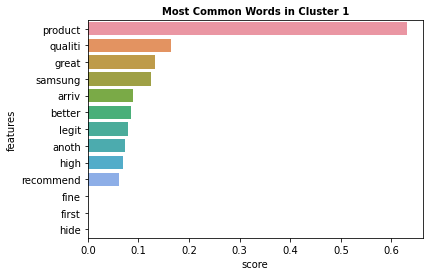

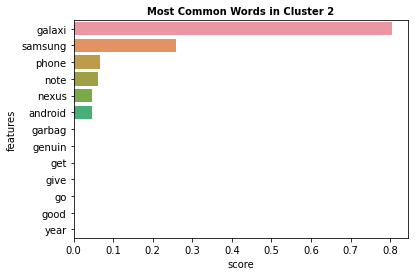

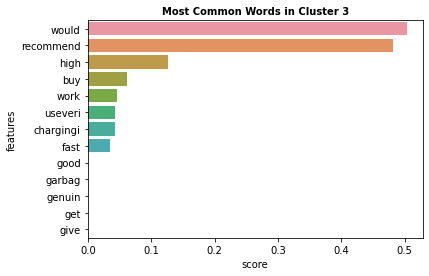

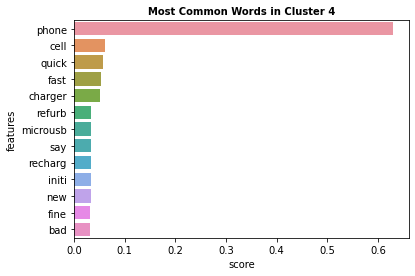

In [60]:
best_result = 5
kmeans = kmeans_results.get(best_result)

final_df_array = final_df.to_numpy()
prediction = kmeans.predict(final_df)
n_feats = 20
dfs = get_top_features_cluster(final_df_array, prediction, n_feats)
plotWords(dfs, 13)

In [61]:
# Transforms a centroids dataframe into a dictionary to be used on a WordCloud.
def centroidsDict(centroids, index):
    a = centroids.T[index].sort_values(ascending = False).reset_index().values
    centroid_dict = dict()

    for i in range(0, len(a)):
        centroid_dict.update( {a[i,0] : a[i,1]} )

    return centroid_dict

def generateWordClouds(centroids):
    wordcloud = WordCloud(max_font_size=100, background_color = 'white')
    for i in range(0, len(centroids)):
        centroid_dict = centroidsDict(centroids, i)        
        wordcloud.generate_from_frequencies(centroid_dict)

        plt.figure()
        plt.title('Cluster {}'.format(i))
        plt.imshow(wordcloud)
        plt.axis("off")
        plt.show()

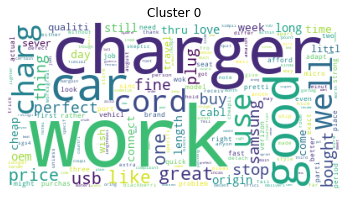

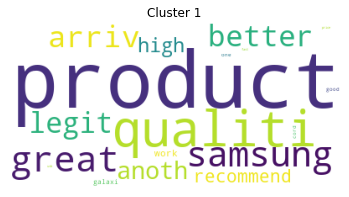

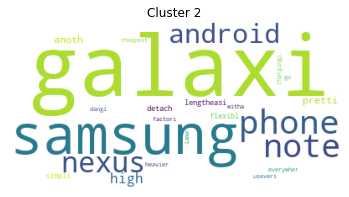

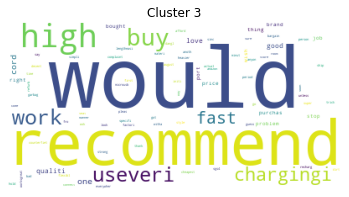

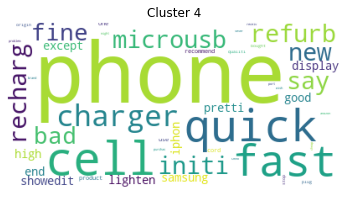

In [62]:
centroids = pd.DataFrame(kmeans.cluster_centers_)
centroids.columns = final_df.columns
generateWordClouds(centroids)

In [63]:
centroids.head()

,100,12v,act,actual,adapt,addit,afford,algun,allow,also,...,without,wok,wonder,work,worksgreat,worn,worth,would,wrong,year
0,0.002555,2.336190e-03,2.110304e-03,4.746159e-03,5.222357e-03,2.118326e-03,5.047450e-03,1.427442e-03,2.118326e-03,2.833384e-03,...,4.023663e-03,4.905516e-03,2.403172e-03,7.465075e-02,3.496503e-03,2.615244e-03,0.002555,4.163336e-17,2.472401e-03,1.713683e-03
1,0.000000,-2.168404e-19,2.168404e-19,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.168404e-19,0.000000e+00,0.000000e+00,...,4.336809e-19,0.000000e+00,0.000000e+00,1.387779e-17,4.336809e-19,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
2,0.000000,-2.168404e-19,0.000000e+00,0.000000e+00,-8.673617e-19,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,-4.336809e-19,0.000000e+00,0.000000e+00,-4.336809e-19,0.000000,-3.469447e-18,-4.336809e-19,-2.168404e-19
3,0.000000,-2.168404e-19,2.168404e-19,8.673617e-19,-8.673617e-19,0.000000e+00,8.673617e-19,4.336809e-19,0.000000e+00,4.336809e-19,...,0.000000e+00,8.673617e-19,-4.336809e-19,4.682894e-02,8.673617e-19,0.000000e+00,0.000000,5.033184e-01,-4.336809e-19,0.000000e+00
4,0.000000,-2.168404e-19,-2.168404e-19,-8.673617e-19,-8.673617e-19,-2.168404e-19,0.000000e+00,2.168404e-19,-2.168404e-19,0.000000e+00,...,-8.673617e-19,0.000000e+00,0.000000e+00,0.000000e+00,4.336809e-19,4.336809e-19,0.000000,-6.938894e-18,0.000000e+00,-2.168404e-19


In [22]:
language = 'english'
corpus = processCorpus(corpus, language)
corpus[18][0:460]

FileNotFoundError: [Errno 2] No such file or directory: 'lists/countries.txt'

In [ ]:
type(reviews)

In [3]:
review_str = ''
for review in reviews:
    review_str += review
    

In [4]:
review_str

"very good charger, it woks fine, no complaints!!! I would recommend it!! It was good, but not using it anymore!This product arrived when promised and in the condition promised. It is a genuine Blackberry charger. It was brand new and worked perfectly. For the price, I don't think you can ask for much more than that!Great product. Use this with my Galaxy S4. At this price I bought 2 more. One for work and one to keep in the car incase I ever travel and forget my charger.Honestly I have always loved this specific model, since you can just take it with you on the road not worrying if you end up losing it or leaving it where ever you go. Though it doesn't exactly meet the fast charging needs of high end phones, it works pretty well on all of them, you just need to be patient.I've had this charger well over a year now, and it still works perfectly.  Most chargers would have broken by now.  The folding blades make this more portable than the chargers that come with some Blackberry models th

In [6]:
from rake_nltk import Rake
r = Rake()
r.extract_keywords_from_text(review)
r.get_ranked_phrases()

['detachable cable option gives',
 'usb cable chargers',
 'travel charger',
 'good quality',
 'good flexibility',
 'use',
 'purchase',
 'pleased']

In [ ]:
str_of_five = ''
list_of_strings = []
counter = 0
for review in reviews:
    counter += 1
    str_of_five += review
    if counter == len(reviews) // 8:
        list_of_strings.append(str_of_five)
        counter = 0
        str_of_five = ''

In [ ]:
list_of_strings

In [ ]:
from rake_nltk import Rake
r = Rake()
all_tags = []
for reviews in list_of_strings:
    current_tag = []
    r.extract_keywords_from_text(reviews)
    current_tag = r.get_ranked_phrases()[:5]
    all_tags.append(current_tag)

In [ ]:
all_tags